## KERAS -> Anger Arousal - OCtober 18, 2022 

---

Anger Arousal dataset...

To do: 
1) How do you change the number of classes? 

6 emotion classifications is a fair bit. I'm not sure we're going to have that same kind of semantic differentiation 
 -

#To do... Oct 30, 2022

We want to get more empirical about the number of words...
How do we get rid of stopwords? Does it even matter? 
Suggestion -> just go for frequency of words greater than 10... 

Source: https://datascience.stackexchange.com/questions/107509/how-to-set-vocabulary-size-padding-length-and-embedding-dimension-in-lstm-netwo

#What's the workflow? 

1) We have our exploration phase  
2) Optional manipulation of the dataset
3) Output a list of our replace words... 
4) Replace words with emotions (or not)


## 1. Installing Hugging Face's nlp package and datasets 

In [285]:
!pip install nlp
#!pip install datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Importing the libraries

We even have the dependencies that we need for the test split...

In [286]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [287]:
import warnings
warnings.filterwarnings('ignore')

##3.Importing the dataset

In [288]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [289]:
#Loading the dataset... We originally have a shape of (81302,4)

df1=pd.read_csv("/content/drive/MyDrive/Sean/Emotion datasets/anger_arousal_F2000books_w400_V2.csv")

In [290]:
#Let's check out the shape and the dimensions

print(df1.shape)
df1.head()

(81302, 4)


,Unnamed: 0,text,emotion1,emotion2
0,0,ir spindles till bagheera and i lair in the ho...,rage,rage
1,1,hide till we watched the villages die under in...,rage,rage
2,2,d savagely calling mowgli a for an answer mowg...,rage,rage
3,3,rately he drove the dholes from silence to gro...,rage,rage
4,4,r turning off too soon he ran cleanly evenly a...,rage,rage


In [291]:
#What categories do we have? This is not the greatest way to do the visualization...
#It would be better if it was grouped... 
#What we have here is a multi-index dataframe 

#print(df1['emotion1'].value_counts())


print(df1['emotion2'].value_counts())

angry         32000
rage          22490
calm          16766
agitated       6004
annoyed        3412
frustrated      630
Name: emotion2, dtype: int64


In [292]:
#Let's try a single groupby() and then see what happens...Alright -> this is not working TBC
#df.groupby(['Animal']).mean()

#df2 = df1.groupby(['emotion2'])
#df2.head()

In [293]:
#converting the variable and creating our label..

df1['label']=df1['emotion2']

In [294]:
#Cleaning the dataset... 

df1.drop(['emotion1','Unnamed: 0','emotion2'], axis=1, inplace=True)
print(df1.shape)
df1.head()

(81302, 2)


,text,label
0,ir spindles till bagheera and i lair in the ho...,rage
1,hide till we watched the villages die under in...,rage
2,d savagely calling mowgli a for an answer mowg...,rage
3,rately he drove the dholes from silence to gro...,rage
4,r turning off too soon he ran cleanly evenly a...,rage


In [295]:
#Let's see what our labels are...
#Always want to look for the lowest classification example... Total length -> 79K
#Dumb baseline is 32K/80K => 40%

df1['label'].value_counts()

angry         32000
rage          22490
calm          16766
agitated       6004
annoyed        3412
frustrated      630
Name: label, dtype: int64

#Changing the dataset...
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

Oct 19,2022: If I reduce the dataset size - it is erroring out on train / test / validate split

So let's try to fold "frustrated" into "annoyed" and see what happens - see if we can just isolate that error... 

In [296]:
#Alright with this piece of code we've just created 5 categories...
#Let's see if this is the problematic piece of code... 

df1 = df1[df1["label"] != "frustrated"]
df1 = df1[df1["label"] != "annoyed"]
df1 = df1[df1["label"] != "agitated"]


#Checking the categories... 

print(df1.shape)

(71256, 2)


In [297]:
#Trying the old replacement ploy... 

#df1['label'].replace("frustrated","annoyed", inplace=True)

In [298]:
#Let's try another replacement ploy....
#Now we're down to like a 4 way stratification which I can certainly live with... 

#df1['label'].replace("annoyed","agitated",inplace = True)

In [299]:
#Let's see the shape here...

df1['label'].value_counts()

angry    32000
rage     22490
calm     16766
Name: label, dtype: int64

In [300]:
#Let's see if we have missing values...No missing values... 

df1.isna().sum()

text     0
label    0
dtype: int64

In [301]:
#Removing the key emotion words...
#This step can happen after the relabeling because it's jus tpassing through the text to get these things...
#The Badhresh Savani -> ["love","fear","joy","surprise","anger","sadness"] 

words =['rage','fury','wrath','wrathful','furious',"angry", "anger", "angered","mad","maddening",
    "frustrated","fustration", "frustrate","agitated", "agitating","upset",'upsetting','irritate',
    'irritating',"annoying","annoy","annoyed","calm","peaceful","serene","serenity"]

for j in words: 
  df1['text'] = df1['text'].str.replace(j,'emotions')

#Shuffling the dataset...
Important step to ensure that the splits are working well 

Resource: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [302]:
#Check the order pre-shuffle...

print(df1.shape)

df1.head()

(71256, 2)


,text,label
0,ir spindles till bagheera and i lair in the ho...,rage
1,hide till we watched the villages die under in...,rage
2,d savagely calling mowgli a for an answer mowg...,rage
3,rately he drove the dholes from silence to gro...,rage
4,r turning off too soon he ran cleanly evenly a...,rage


In [303]:
#The shuffle 

df1 = df1.sample(frac=1)

In [304]:
#Checking the shuffle - it works... 

print(df1.shape)

df1.head()

#type(df1)

(71256, 2)


,text,label
16162,moral what sort of a man was wakefield we are...,calm
26325,ather and speaking to his great surprise in en...,angry
47053,sovereign whom they must obey nay whom they s...,rage
76319,m a dependent an object of charity a joke to t...,angry
24001,ancaster i p b def pertaining to faction proce...,rage


# Splitting dataset into train, validate and split datasets.
---

See this method of doing it in Keras...
https://www.tensorflow.org/datasets/splits



In [305]:
import numpy as np
train, validate, test = np.split(df1.sample(frac=1, random_state=42), 
                       [int(.6*len(df1)), int(.8*len(df1))])
# int(.6*len(df)---> it will first split the dataframe at n=60%/.6, 
#                   where n is the length of the dataframe.
# int(.8*len(df)---> It will further break the df into validate set where .6 < n <.8
# the remaining n will fall into the test set.

In [306]:
#Let's test this now... 
print(train.shape)
print(validate.shape)
print(test.shape)

(42753, 2)
(14251, 2)
(14252, 2)


Converting pandas dataframe into Arrow_Dataset.

SM: Do we need this step if we're just creating lists? 

In [307]:
def pdDataframe_to_ArrowDataset(df):
  import pyarrow as pa
  import pyarrow.dataset as ds
  from datasets import Dataset
  dataset = ds.dataset(pa.Table.from_pandas(df).to_batches())
  ### convert to Huggingface dataset
  arrowdataset = Dataset(pa.Table.from_pandas(df))
  return arrowdataset


In [308]:
#Applying the function to the dataset... 

train=pdDataframe_to_ArrowDataset(train)
validate=pdDataframe_to_ArrowDataset(validate)
test=pdDataframe_to_ArrowDataset(test)

In [309]:
#Checking what type of variable this is... 

print(type(train),type(validate),type(test))

<class 'datasets.arrow_dataset.Dataset'> <class 'datasets.arrow_dataset.Dataset'> <class 'datasets.arrow_dataset.Dataset'>


In [310]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [311]:
#Applying the function to that part of the dataset -> 

tweets, labels = get_tweets(train)
tweets[10], labels[10]

('ound and a spirit may not walk by night that is with fetters bound and a spirit may but weep that lies in such unholy ground he is at wretched at peace or will be soon there is no thing to make him emotions nor does terror walk at noon for the lampless earth in which he lies has neither sun nor moon they hanged him as a beast is hanged they did not even toll a requiem that might have brought rest to h',
 'angry')

## 4. Tokenizing the Tweets

In [312]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [313]:
tokenizer = Tokenizer(num_words=30000, oov_token='<UNK>')

tokenizer.fit_on_texts(tweets)

print(tokenizer.texts_to_sequences([tweets[10]]))

[[9624, 3, 6, 357, 120, 20, 902, 31, 182, 11, 21, 14, 10001, 863, 3, 6, 357, 120, 22, 1632, 11, 847, 8, 84, 12325, 402, 10, 21, 26, 1406, 26, 315, 37, 56, 27, 278, 52, 21, 45, 203, 5, 128, 25, 7, 178, 293, 522, 902, 26, 2838, 18, 2, 27795, 272, 8, 39, 10, 847, 95, 429, 405, 178, 791, 34, 3480, 25, 17, 6, 821, 21, 3480, 34, 71, 20, 137, 10823, 6, 17959, 11, 144, 32, 307, 330, 5, 287]]


## 5. Padding and Truncating Sequences

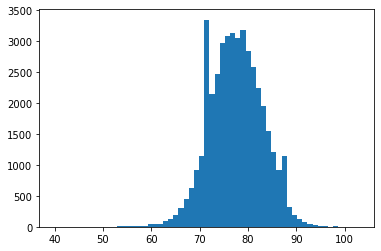

In [314]:
lengths = [len(t.split(' ')) for t in tweets]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [315]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [316]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=100, padding='post')
    return padded_sequences

In [317]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [318]:
padded_train_sequences[10]

array([ 9624,     3,     6,   357,   120,    20,   902,    31,   182,
          11,    21,    14, 10001,   863,     3,     6,   357,   120,
          22,  1632,    11,   847,     8,    84, 12325,   402,    10,
          21,    26,  1406,    26,   315,    37,    56,    27,   278,
          52,    21,    45,   203,     5,   128,    25,     7,   178,
         293,   522,   902,    26,  2838,    18,     2, 27795,   272,
           8,    39,    10,   847,    95,   429,   405,   178,   791,
          34,  3480,    25,    17,     6,   821,    21,  3480,    34,
          71,    20,   137, 10823,     6, 17959,    11,   144,    32,
         307,   330,     5,   287,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

## 6. Preparing the Labels

In [319]:
classes = set(labels)
print(classes)

{'calm', 'angry', 'rage'}


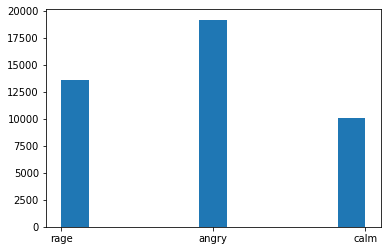

In [320]:
plt.hist(labels, bins=11)
plt.show()

In [321]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [322]:
classes_to_index

{'calm': 0, 'angry': 1, 'rage': 2}

In [323]:
index_to_classes

{0: 'calm', 1: 'angry', 2: 'rage'}

In [324]:
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [325]:
train_labels = names_to_ids(labels)
print(train_labels[10])

1


## 7. Creating the Model

In [326]:
#Compiling the model...What I need to know is whether you could... 
#Drop down to 5 different layers on the Dense layer -> 6 is too much 
#Where and how could you recombine the datsets? 


model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(30000, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           480000    
                                                                 
 bidirectional_10 (Bidirecti  (None, 100, 40)          5920      
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 40)               9760      
 onal)                                                           
                                                                 
 dense_5 (Dense)             (None, 3)                 123       
                                                                 
Total params: 495,803
Trainable params: 495,803
Non-trainable params: 0
_________________________________________________________________


## 8. Training the Model

In [327]:
val_tweets, val_labels = get_tweets(validate)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [328]:
#val_tweets[20], val_labels[20]

In [329]:
#Having the callbacks option on means that the model stops once you are like over-generalizing... 
#Let's leave the callback option on for now...

h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=30,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
   ]
)

Epoch 1/30
1337/1337 [==============================] - 35s 21ms/step - loss: 0.9017 - accuracy: 0.5532 - val_loss: 0.7717 - val_accuracy: 0.6367
Epoch 2/30
1337/1337 [==============================] - 27s 20ms/step - loss: 0.6429 - accuracy: 0.7159 - val_loss: 0.7071 - val_accuracy: 0.6920
Epoch 3/30
1337/1337 [==============================] - 27s 20ms/step - loss: 0.4498 - accuracy: 0.8200 - val_loss: 0.7483 - val_accuracy: 0.6972
Epoch 4/30
1337/1337 [==============================] - 27s 20ms/step - loss: 0.2978 - accuracy: 0.8897 - val_loss: 0.8258 - val_accuracy: 0.7077
Epoch 5/30
1337/1337 [==============================] - 27s 20ms/step - loss: 0.1876 - accuracy: 0.9358 - val_loss: 0.9469 - val_accuracy: 0.7061
Epoch 6/30
1337/1337 [==============================] - 27s 20ms/step - loss: 0.1225 - accuracy: 0.9582 - val_loss: 1.0994 - val_accuracy: 0.6946


## 9. Evaluating the Model

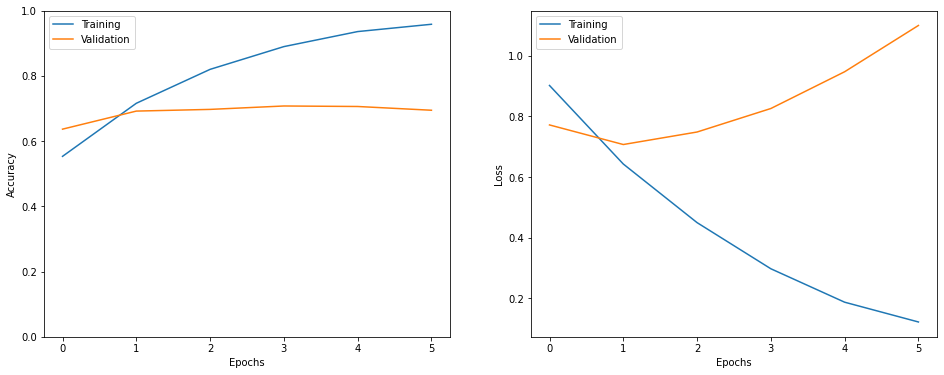

In [330]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(h)

In [331]:
test_tweets, test_labels = get_tweets(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [332]:
eval = model.evaluate(test_sequences, test_labels)

446/446 [==============================] - 4s 9ms/step - loss: 1.0717 - accuracy: 0.7024


In [333]:
#preds = model.predict_classes(test_sequences)
preds=model.predict(test_sequences) 
classes_x=np.argmax(preds,axis=1)
preds.shape, test_labels.shape

446/446 [==============================] - 5s 8ms/step


((14252, 3), (14252,))

#Resources:

In [334]:
#! pip install datasets

In [335]:
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

df = pd.DataFrame({'a': [0,1,2], 'b': [3,4,5]})
dataset = ds.dataset(pa.Table.from_pandas(df).to_batches())

### convert to Huggingface dataset
hg_dataset = Dataset(pa.Table.from_pandas(df))

In [336]:
type(hg_dataset)

datasets.arrow_dataset.Dataset